# Mission: What's up with the ABCD plane?

#### We should understand the shape of the plane, how it looks b/w signal and background, how independant the axes are, etc.

## Imports

In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory
import awkward as ak
# local
sys.path.insert(1, os.path.join(sys.path[0], '../../')) # This is definitely a bit hacky, but I don't mind
from sidm.tools import ffschema, sidm_processor, utilities, scaleout
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
importlib.reload(scaleout)
#plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
import hist
from sidm.tools import histogram as h
importlib.reload(h)

<module 'sidm.tools.histogram' from '/home/cms-jovyan/SIDM/sidm/studies/../../sidm/tools/histogram.py'>

## Sample Exploration

### Ntuple Branch Details

https://wsi.web.cern.ch/wsi/Firefighter/sigmc.html

### What's in the ntuples?

This loads the ntuple into awkward with FFschema applied. Open the root file directly with uproot for a more honest assesment of the brances in the files, but this is sufficient for now

In [2]:
sample_dir = "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018/"
sample_name = "SIDM_XXTo2ATo2Mu2E_mXX-100_mA-1p2_ctau-9p6"
sample_file = f"{sample_dir}/{sample_name}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_161703/0000/ffNtuple_1.root"

events = NanoEventsFactory.from_root(
    sample_file,
    treepath='ffNtuplizer/ffNtuple',
    schemaclass=ffschema.FFSchema,
    metadata = {
        "dataset" : sample_name, 
    },
).events()
ak.fields(events)

['run',
 'event',
 'lumi',
 'fixedGridRho',
 'puInteractionNum',
 'trueInteractionNum',
 'weight',
 'weightProduct',
 'HLT_DoubleL2Mu23NoVtx_2Cha',
 'HLT_DoubleL2Mu23NoVtx_2Cha_NoL2Matched',
 'HLT_DoubleL2Mu23NoVtx_2Cha_CosmicSeed',
 'HLT_DoubleL2Mu23NoVtx_2Cha_CosmicSeed_NoL2Matched',
 'HLT_DoubleL2Mu25NoVtx_2Cha',
 'HLT_DoubleL2Mu25NoVtx_2Cha_NoL2Matched',
 'HLT_DoubleL2Mu25NoVtx_2Cha_CosmicSeed',
 'HLT_DoubleL2Mu25NoVtx_2Cha_CosmicSeed_NoL2Matched',
 'HLT_DoubleL2Mu25NoVtx_2Cha_Eta2p4',
 'HLT_DoubleL2Mu25NoVtx_2Cha_CosmicSeed_Eta2p4',
 'tomatchfilter_result',
 'tomatchfilter_HLTDoubleL2Mu23NoVtx2Cha',
 'tomatchfilter_HLTDoubleL2Mu23NoVtx2ChaNoL2Matched',
 'tomatchfilter_HLTDoubleL2Mu23NoVtx2ChaCosmicSeed',
 'tomatchfilter_HLTDoubleL2Mu23NoVtx2ChaCosmicSeedNoL2Matched',
 'tomatchfilter_HLTDoubleL2Mu25NoVtx2ChaEta2p4',
 'tomatchfilter_HLTDoubleL2Mu25NoVtx2ChaCosmicSeedEta2p4',
 'pfMetT0pcT1',
 'genmet',
 'pfMetT0pcT1Txy',
 'pfMetT1',
 'pfMet',
 'muon',
 'gen',
 'pv',
 'hftagscore',
 '

In [3]:
ak.fields(events.pv)

['rho', 'z', 'isFake', 'ndof', 'normChi2']

In [4]:
ak.count(events.pv.z, axis=-1)

<Array [11, 20, 26, 21, 29, ... 42, 32, 23, 44] type='18359 * int64'>

In [5]:
ak.num(events.pv.z, axis=-1)

<Array [11, 20, 26, 21, 29, ... 42, 32, 23, 44] type='18359 * int64'>

In [6]:
ak.fields(events.muon)

['charge',
 'type',
 'bestTrackType',
 'selectors',
 'hasInnerTrack',
 'hasOuterTrack',
 'd0',
 'd0Sig',
 'dz',
 'dzSig',
 'normChi2',
 'dtCscTime',
 'rpcTime',
 'isoValue',
 'simType',
 'p4']

### What's in the output once we run the processor?

In [7]:
sample_dir = "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018/"
fileset = {
    sample_name: [
        sample_file,
    ],
}

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
)

p = sidm_processor.SidmProcessor(
    [
        "2mu2e_matchedLj",
    ],
    ["base_plus_gen"]
)

output = runner(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)

Output()

Output()

In [8]:
print(output[sample_name].keys())

dict_keys(['cutflow', 'hists'])


In [9]:
hists = output[sample_name]["hists"]
utilities.print_list(hists.keys())

pv_n
pv_ndof
pv_z
pv_rho
electron_n
electron_pt
electron_eta_phi
photon_n
photon_pt
photon_eta_phi
muon_n
muon_pt
muon_eta_phi
dsaMuon_n
dsaMuon_pt
dsaMuon_eta_phi
lj_n
lj_pt
egm_lj_pt
mu_lj_pt
lj0_pt
lj1_pt
lj0_e
lj1_e
lj_eta_phi
lj_electronN
lj_photonN
lj_electronPhotonN
lj_muonN
ljsource_n
ljsource_pt
ljsource_eta_phi
ljsource_charge
ljsource_type
electron_lj_dR
electron_lj_dR_lowRange
photon_lj_dR
photon_lj_dR_lowRange
photon_lj_dR_reallyLowRange
muon_lj_dR
muon_lj_dR_lowRange
dsaMuon_lj_dR
dsaMuon_lj_dR_lowRange
lj_lj_absdphi
lj_lj_invmass
lj_lj_invmass_lowRange
lj_pfIsolation05
lj0_pfIsolation05
lj1_pfIsolation05
lj_pfIsolationPtNoPU05
lj_pfIsolationPt05
lj_pfIsolation07
lj_pfIsolationPtNoPU07
lj_pfIsolationPt07
lj_pfiso
abcd_lj_lj_dphi_vs_lj0_pfIsolationPt05
gen_abspid
genE_pt
genE0_pt
genE1_pt
genE0_pt_highRange
genE1_pt_highRange
genE_genE_dR
genE_genE_pt
genMu_pt
genMu0_pt
genMu1_pt
genMu0_pt_highRange
genMu1_pt_highRange
genMu_genMu_dR
genMu_genMu_pt
genA_pt
genA_pt_highRang

#### Lepton Jet Fields

"pfjet" apparently stores the lepton jet information.

In [10]:
ak.fields(events.pfjet)

['chargedHadronE',
 'neutralHadronE',
 'chargedEmE',
 'neutralEmE',
 'photonE',
 'electronE',
 'muonE',
 'hfHadronE',
 'hfEmE',
 'charged_n',
 'neutral_n',
 'chargedHadron_n',
 'neutralHadron_n',
 'photon_n',
 'electron_n',
 'muon_n',
 'area',
 'maxDistance',
 'pfIsolationNoPU05',
 'neuIsolationNoPU05',
 'hadIsolationNoPU05',
 'pfIsolation05',
 'neuIsolation05',
 'hadIsolation05',
 'tkPtSum05',
 'tkPtRawSum05',
 'tkIsolation05',
 'pfIsolationPtNoPU05',
 'pfIsolationPt05',
 'pfIsolationNoPU07',
 'neuIsolationNoPU07',
 'hadIsolationNoPU07',
 'pfIsolation07',
 'neuIsolation07',
 'hadIsolation07',
 'tkPtSum07',
 'tkPtRawSum07',
 'tkIsolation07',
 'pfIsolationPtNoPU07',
 'pfIsolationPt07',
 'tracks_n',
 'ptDistribution',
 'dRSpread',
 'pfiso',
 'mindr',
 'cleaned',
 'averagevtx',
 'p4',
 'medianvtx',
 'kinvtx',
 'pfcands',
 'pfcand',
 'klmvtx']

In [11]:
ak.fields(events.pfjet.pfcand)

['type',
 'charge',
 'pt',
 'eta',
 'phi',
 'energy',
 'tkD0',
 'tkD0Sig',
 'tkDz',
 'tkDzSig',
 'tkNormChi2',
 'electronIdx',
 'photonIdx',
 'pfmuonIdx',
 'dsamuonIdx',
 'time',
 'timeErr',
 'muonTime',
 'muonTimeErr',
 'muonTimeStd',
 'tkD0Max',
 'tkD0Sub',
 'tkD0Min',
 'tkD0SigMax',
 'tkD0SigSub',
 'tkD0SigMin']

In [12]:
ak.fields(events.pfjet.pfcands)

['chargedMass', 'nDsaMu', 'maxPtType', 'minTwoTkDist', 'maxTwoTkDist']

In [13]:
ak.count(events.pfjet.pfcand.pt, axis=-1)

<Array [[2], [], [], [2], ... [2], [1, 2], []] type='18359 * var * int64'>

In [14]:
ak.count(events.pfjet.p4.pt, axis=-1)

<Array [1, 0, 0, 1, 0, 1, ... 0, 0, 0, 1, 2, 0] type='18359 * int64'>

In [15]:
events.pfjet.pfIsolation05

<Array [[0.0575], [], ... 0.124, 0.224], []] type='18359 * var * float32[paramet...'>

In [16]:
ak.count(events.pfjet.pfIsolation05, axis=-1)

<Array [1, 0, 0, 1, 0, 1, ... 0, 0, 0, 1, 2, 0] type='18359 * int64'>

In [17]:
events.pfjet.p4.pt

<Array [[42.5], [], [], ... [72.5, 38.5], []] type='18359 * var * float32'>

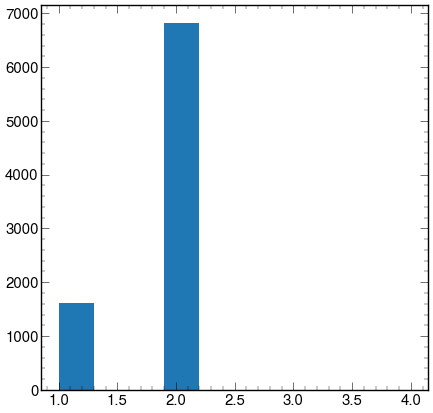

In [18]:
plt.hist(ak.count(events.pfjet.pfcand.pt, axis=-1)[ak.count(events.pfjet.p4.pt, axis=-1)>0][:,0], weights=events.weightProduct[ak.count(events.pfjet.p4.pt, axis=-1)>0])
plt.show()

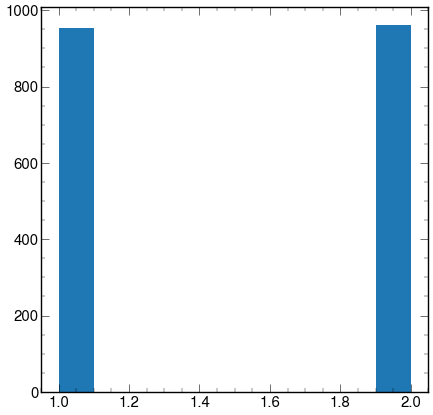

In [19]:
plt.hist(ak.count(events.pfjet.pfcand.pt, axis=-1)[ak.count(events.pfjet.p4.pt, axis=-1)>1][:,1], weights=events.weightProduct[ak.count(events.pfjet.p4.pt, axis=-1)>1])
plt.show()

In [20]:
events.pfjet.pfcand.pt

<Array [[[29.1, 13.4]], ... 21.6, 16.9]], []] type='18359 * var * var * float64[...'>

In [21]:
ak.flatten(ak.flatten(events.pfjet.pfcand.pt))

<Array [29.1, 13.4, 59.3, ... 72.5, 21.6, 16.9] type='29003 * float64[parameters...'>

#### Different Isolation Variables

Note here that "pfIsolation05" seems most consistent with the text description of the isolation variable

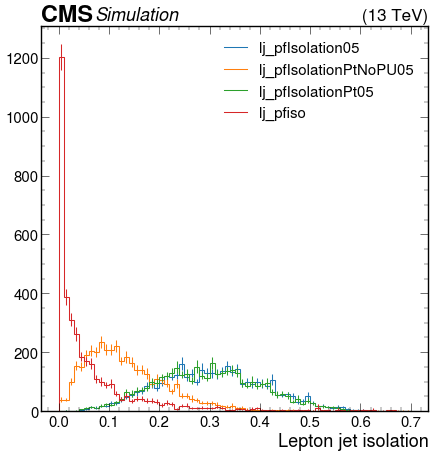

In [22]:
isolist = ["lj_pfIsolation05","lj_pfIsolationPtNoPU05","lj_pfIsolationPt05","lj_pfiso"]
utilities.plot([hists[f"{name}"]["2mu2e_matchedLj",:70] for name in isolist])
plt.legend(isolist)

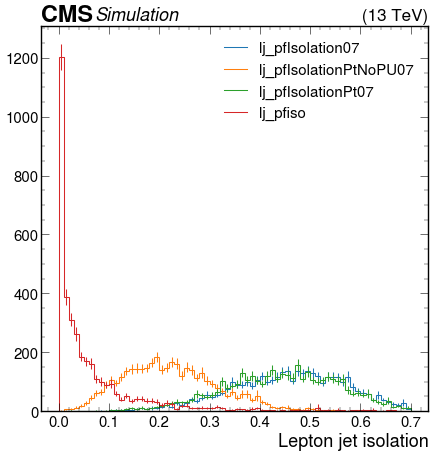

In [23]:
isolist = ["lj_pfIsolation07","lj_pfIsolationPtNoPU07","lj_pfIsolationPt07","lj_pfiso"]
utilities.plot([hists[f"{name}"]["2mu2e_matchedLj",:70] for name in isolist])
plt.legend(isolist)

#### This is repeated from lj notebook for double checking:

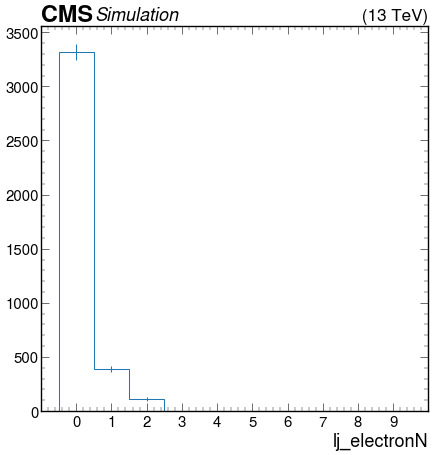

In [24]:
utilities.plot(hists["lj_electronN"]["2mu2e_matchedLj", :])

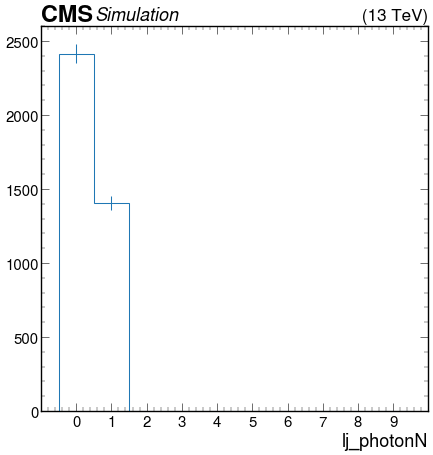

In [25]:
utilities.plot(hists["lj_photonN"]["2mu2e_matchedLj", :])

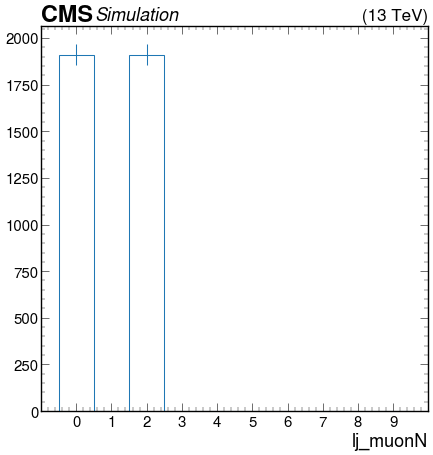

In [26]:
utilities.plot(hists["lj_muonN"]["2mu2e_matchedLj", :])

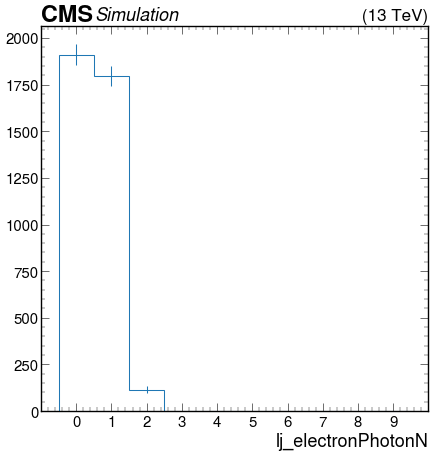

In [27]:
utilities.plot(hists["lj_electronPhotonN"]["2mu2e_matchedLj", :])

Number of electrons, photons, and muons in ljsources seems ballpark reasonable if one remembers that most ljs in this particular sample contain either 2 reco muons or 1 reco photon

## Multiple Samples ABCD Studies

### Execution (Dask or Otherwise)

ERROR seen here. With the DaskExecutor, a different version of the histogram list seems to be called upon.

In [28]:
client = scaleout.make_dask_client("tls://localhost:8786")

/opt/conda/lib/python3.8/site-packages/distributed/client.py:1288: VersionMismatchWarning: Mismatched versions found

+---------+----------------+----------------+----------------+
| Package | client         | scheduler      | workers        |
+---------+----------------+----------------+----------------+
| python  | 3.8.16.final.0 | 3.8.16.final.0 | 3.8.15.final.0 |
+---------+----------------+----------------+----------------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


Comment out the DaskExecutor line and swap with FuturesExecutor line if you wish to run Dask free. And you can skip this ^

In [29]:
samples = [
    "2Mu2E_100GeV_1p2GeV_0p096mm",
    "2Mu2E_100GeV_1p2GeV_9p6mm",
    "2Mu2E_100GeV_5GeV_4mm",
    "2Mu2E_150GeV_5GeV_2p7mm",
    "2Mu2E_200GeV_5GeV_2mm",
    "2Mu2E_500GeV_5GeV_0p8mm",
    "2Mu2E_800GeV_5GeV_0p5mm",
    "2Mu2E_1000GeV_5GeV_0p4mm"
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    executor=processor.FuturesExecutor(),
    # executor=processor.DaskExecutor(client=client),
    schema=ffschema.FFSchema,
)

p = sidm_processor.SidmProcessor(
    [
        "2mu2e_matchedLj",
    ],
    ["base_plus_gen"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)

Output()

Output()

In [30]:
output.keys()

dict_keys(['out', 'processed', 'exception'])

In [31]:
output['out'].keys()

dict_keys(['2Mu2E_1000GeV_5GeV_0p4mm', '2Mu2E_800GeV_5GeV_0p5mm', '2Mu2E_500GeV_5GeV_0p8mm', '2Mu2E_200GeV_5GeV_2mm', '2Mu2E_150GeV_5GeV_2p7mm', '2Mu2E_100GeV_5GeV_4mm', '2Mu2E_100GeV_1p2GeV_9p6mm', '2Mu2E_100GeV_1p2GeV_0p096mm'])

In [32]:
output['out']['2Mu2E_1000GeV_5GeV_0p4mm'].keys()

dict_keys(['cutflow', 'hists'])

In [33]:
output['out']['2Mu2E_1000GeV_5GeV_0p4mm']['hists'].keys()

dict_keys(['pv_n', 'pv_ndof', 'pv_z', 'pv_rho', 'electron_n', 'electron_pt', 'electron_eta_phi', 'photon_n', 'photon_pt', 'photon_eta_phi', 'muon_n', 'muon_pt', 'muon_eta_phi', 'dsaMuon_n', 'dsaMuon_pt', 'dsaMuon_eta_phi', 'lj_n', 'lj_pt', 'egm_lj_pt', 'mu_lj_pt', 'lj0_pt', 'lj1_pt', 'lj0_e', 'lj1_e', 'lj_eta_phi', 'lj_electronN', 'lj_photonN', 'lj_electronPhotonN', 'lj_muonN', 'ljsource_n', 'ljsource_pt', 'ljsource_eta_phi', 'ljsource_charge', 'ljsource_type', 'electron_lj_dR', 'electron_lj_dR_lowRange', 'photon_lj_dR', 'photon_lj_dR_lowRange', 'photon_lj_dR_reallyLowRange', 'muon_lj_dR', 'muon_lj_dR_lowRange', 'dsaMuon_lj_dR', 'dsaMuon_lj_dR_lowRange', 'lj_lj_absdphi', 'lj_lj_invmass', 'lj_lj_invmass_lowRange', 'lj_pfIsolation05', 'lj0_pfIsolation05', 'lj1_pfIsolation05', 'lj_pfIsolationPtNoPU05', 'lj_pfIsolationPt05', 'lj_pfIsolation07', 'lj_pfIsolationPtNoPU07', 'lj_pfIsolationPt07', 'lj_pfiso', 'abcd_lj_lj_dphi_vs_lj0_pfIsolationPt05', 'gen_abspid', 'genE_pt', 'genE0_pt', 'genE1_p

### Isolation

#### Cone of DR 0.5

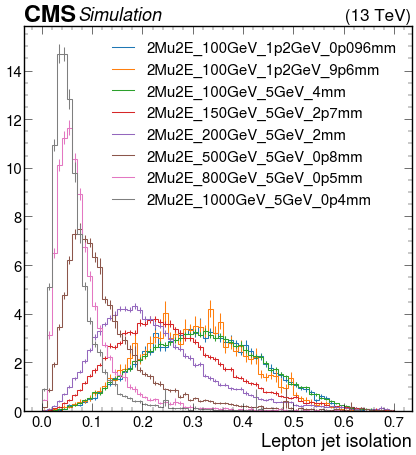

In [34]:
utilities.plot([output['out'][f"{name}"]['hists']['lj_pfIsolation05']["2mu2e_matchedLj",:70] for name in samples], density=True)
plt.legend(samples);

#### Cone of DR 0.7

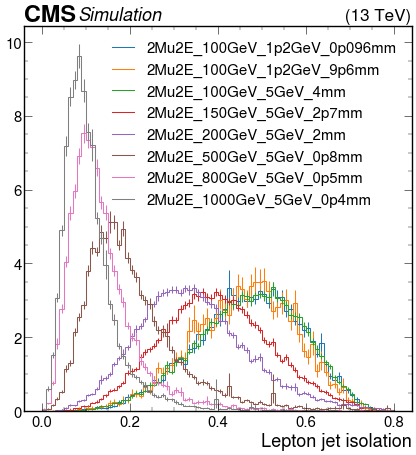

In [35]:
utilities.plot([output['out'][f"{name}"]['hists']['lj_pfIsolation07']["2mu2e_matchedLj",:80] for name in samples], density=True)
plt.legend(samples);

#### Comparing lepton jet isolation and energy

Leading Jet

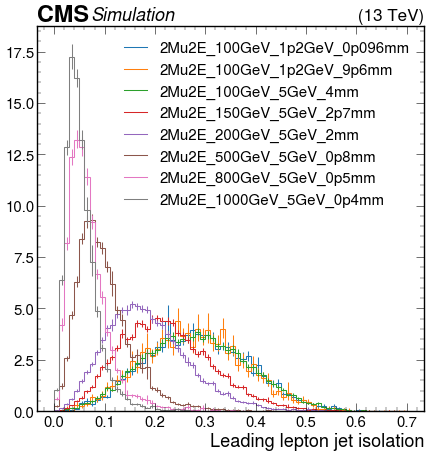

In [36]:
utilities.plot([output['out'][f"{name}"]['hists']['lj0_pfIsolation05']["2mu2e_matchedLj",:70] for name in samples], density=True)
plt.legend(samples);

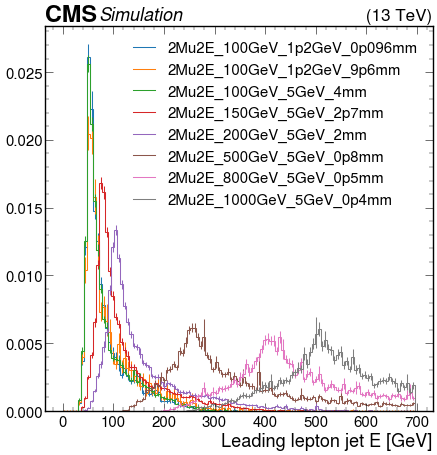

In [37]:
utilities.plot([output['out'][f"{name}"]['hists']['lj0_e']["2mu2e_matchedLj",::3j] for name in samples], density=True)
plt.legend(samples);

Subleading Jet

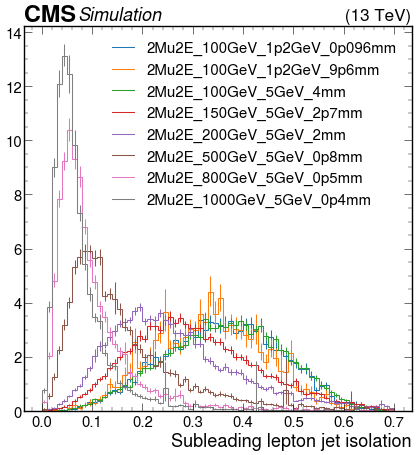

In [38]:
utilities.plot([output['out'][f"{name}"]['hists']['lj1_pfIsolation05']["2mu2e_matchedLj",:70] for name in samples], density=True)
plt.legend(samples);

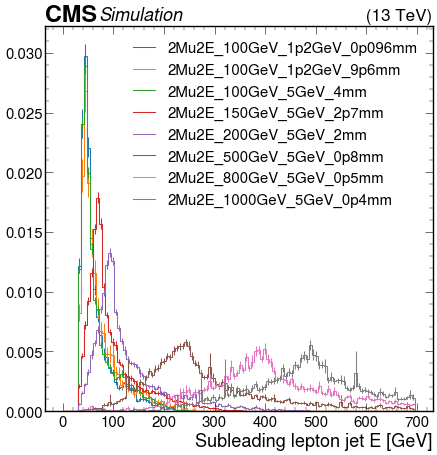

In [39]:
utilities.plot([output['out'][f"{name}"]['hists']['lj1_e']["2mu2e_matchedLj",::3j] for name in samples], density=True)
plt.legend(samples);

Here it's clear that the heavier resonance results in more energetic lepton jets, and assuming PU is uniformly distributed over the same area, it makes sense that the isolation variables diminishes as we go to heavier resonances. Recall that it is defined as sum of PF (not lj constituents) divided by sum of energies from lj and PF (PU).

### $\Delta\phi$

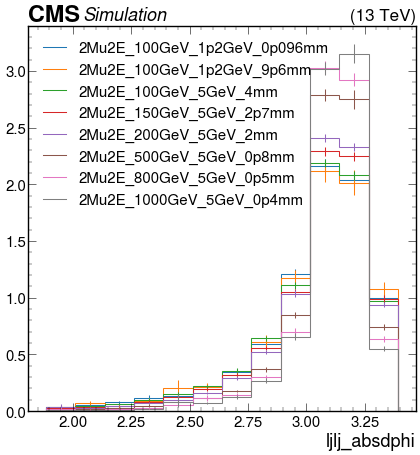

In [40]:
utilities.plot([output['out'][f"{name}"]['hists']["lj_lj_absdphi"]["2mu2e_matchedLj",2j:3.4j] for name in samples], density=True)
plt.legend(samples);

Here, the source of the back-to-back-ness of these jets does come from the resonance mass as well; The heavier the resonance, the more the dark photon decay is in the rest frame, hence the more back to back the boosted lepton jets in the end.

### ABCD Plane

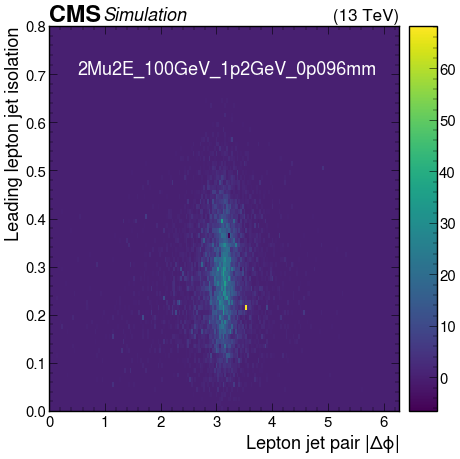

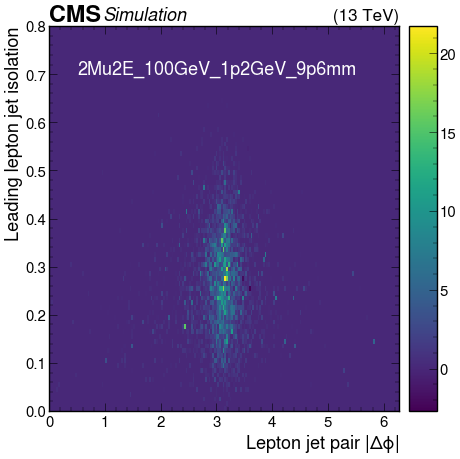

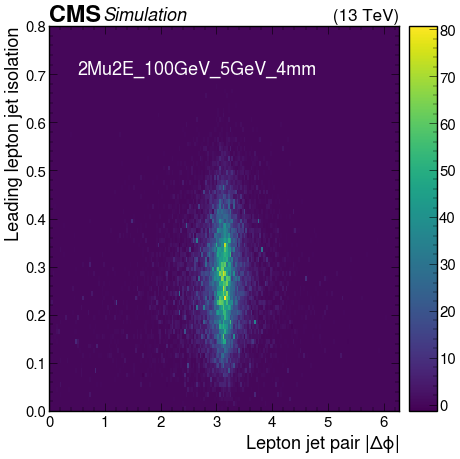

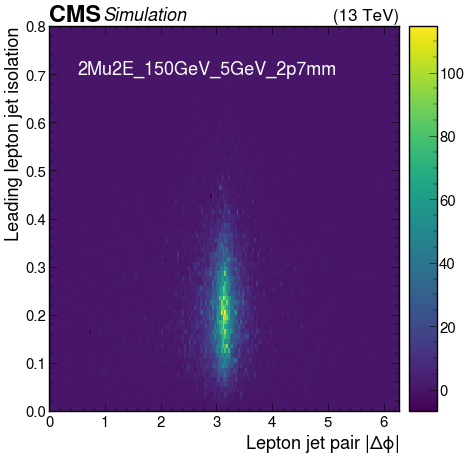

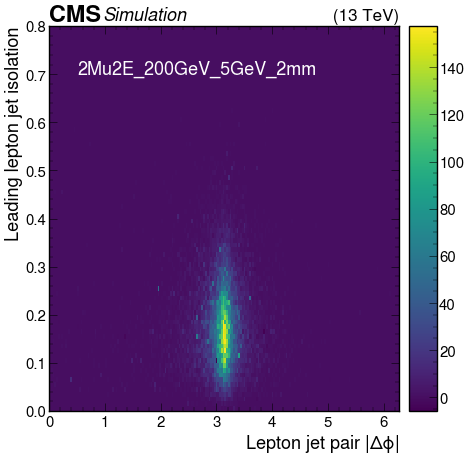

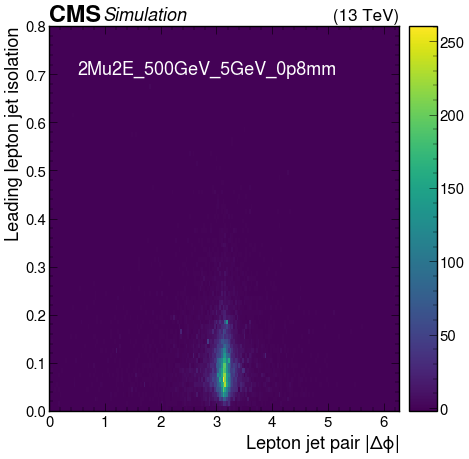

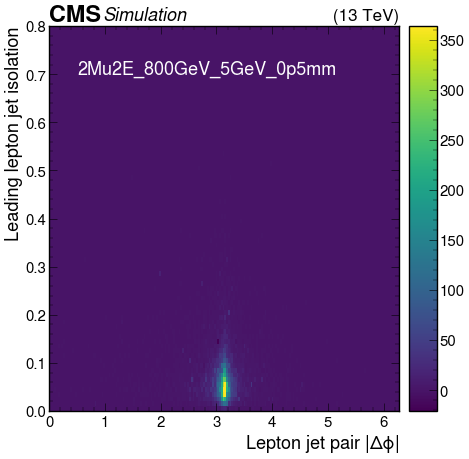

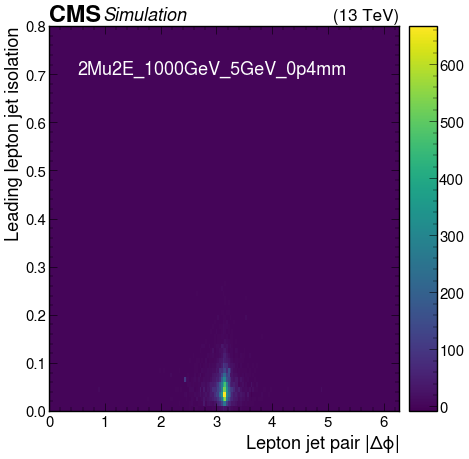

In [41]:
for name in samples:
    utilities.plot(output['out'][f"{name}"]['hists']["abcd_lj_lj_dphi_vs_lj0_pfIsolationPt05"]["2mu2e_matchedLj",:,:])
    plt.text(0.5, 0.7, fr"{name}", color='white')
    plt.show()

ABCD plane looks consistent following the previous observations, the dist gets tighter around dphi=pi and lower in isolation

### LJ Inv Mass

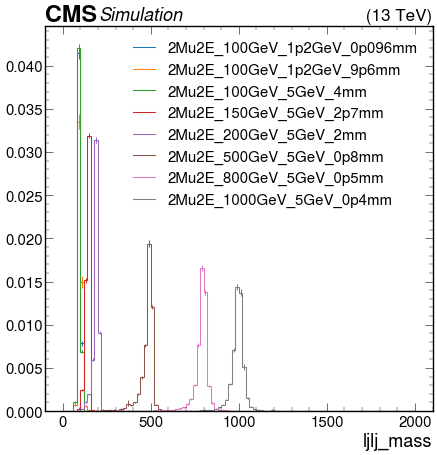

In [42]:
utilities.plot([output['out'][f"{name}"]['hists']["lj_lj_invmass"]["2mu2e_matchedLj",:] for name in samples], density=True)
plt.legend(samples);

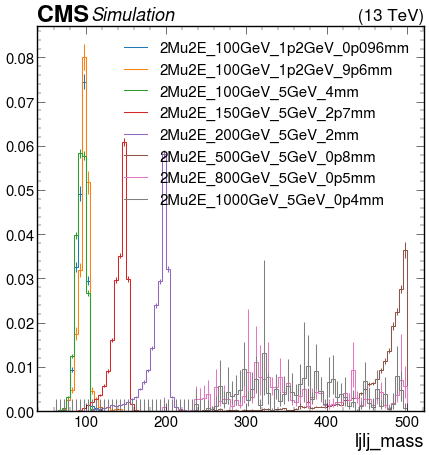

In [43]:
utilities.plot([output['out'][f"{name}"]['hists']["lj_lj_invmass_lowRange"]["2mu2e_matchedLj",60j:] for name in samples], density=True)
plt.legend(samples);

Would the above plots peak for background once cuts on dphi and isolation are imposed? Where would they peak?

Are these axes really independant for background afterall? Maybe a closure plane plot would help?

Finally, this is a fantastic feature. Perhaps we should consider using it as a discriminator?